In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('tmp/DataCoSupplyChainDataset.csv')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajast�n,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajast�n,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Preparación de los datos

In [3]:
df.shape


(180519, 53)

In [4]:
df.drop_duplicates()
df.shape

(180519, 53)

In [5]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


En este df hay presencia de valores nulos en las columnas de codigo postal y descripcion de producto, las cuales no afectan al analisis que se realizara, por lo tanto se dejan tal cual

### Para facilitar el analisis, las columnas del df basado en las caracteristicas, obteniendo asi 6 nuevos dataframes

- Demografia de cliente (customer_demographic)
- Informacion de cliente (order_info) 
- Informacion de producto (product_info)
- Informacion de orden (order_item_info)
- Informacion de ubicacion (location_info)
- Informacion de ventas (sales_info)
  

In [6]:
customer_demographic = df[['Customer Id','Category Id', 'Customer Fname', 'Customer Lname', 'Customer Email', 
                           'Customer City', 'Customer Country', 'Customer State', 'Customer Street', 
                           'Customer Zipcode', 'Customer Segment']]

order_info = df[['Order Id','Product Card Id', 'Order Customer Id', 'order date (DateOrders)', 
                 'Order Status', 'Order Region', 'Order State', 'Order City', 'Order Country', 
                 'shipping date (DateOrders)', 'Shipping Mode','Days for shipping (real)','Days for shipment (scheduled)']]

product_info = df[['Product Card Id','Order Item Id', 'Product Category Id', 'Product Description', 
                   'Product Image', 'Product Name', 'Product Price', 'Product Status']]

order_item_info = df[['Order Item Id', 'Order Item Cardprod Id', 'Order Item Discount', 
                      'Order Item Discount Rate', 'Order Item Product Price', 
                      'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 
                      'Order Item Total', 'Order Profit Per Order']]

location_info = df[['Product Card Id','Latitude', 'Longitude', 'Market', 'Department Id', 'Department Name']]

sales_info = df[['Type','Benefit per order','Sales per customer','Delivery Status',
                 'Late_delivery_risk','Category Id','Category Name']]

### Demografía de cliente

##### Paises a los cuales pertenecen los clientes 

En este dataset se contienen los datos de clientes de diferentes ciudades, pero solo dos paises diferentes:

##### EE. UU. (Estados Unidos): 
- El conjunto de datos abarca 111,146 clientes provenientes de los Estados Unidos.

##### Puerto Rico: 
- El conjunto de datos abarca 69,373 clientes provenientes de Puerto Rico

##### Segmentos de Clientes:

El conjunto de datos clasifica a los clientes en tres segmentos distintos:

- Segmento de Home Office: Este segmento comprende 32,226 clientes que realizan transacciones relacionadas con productos o servicios para la oficina en casa.

- Segmento Corporativo: El segmento corporativo está representado por 54,789 clientes, lo que indica una presencia significativa de transacciones relacionadas con negocios o empresas.

- Segmento de Consumidores: El segmento más grande, compuesto por 93,504 clientes, representa a consumidores individuales que realizan diversos tipos de transacciones.

In [7]:
customer_demographic.head()

,Customer Id,Category Id,Customer Fname,Customer Lname,Customer Email,Customer City,Customer Country,Customer State,Customer Street,Customer Zipcode,Customer Segment
0,20755,73,Cally,Holloway,XXXXXXXXX,Caguas,Puerto Rico,PR,5365 Noble Nectar Island,725.0,Consumer
1,19492,73,Irene,Luna,XXXXXXXXX,Caguas,Puerto Rico,PR,2679 Rustic Loop,725.0,Consumer
2,19491,73,Gillian,Maldonado,XXXXXXXXX,San Jose,EE. UU.,CA,8510 Round Bear Gate,95125.0,Consumer
3,19490,73,Tana,Tate,XXXXXXXXX,Los Angeles,EE. UU.,CA,3200 Amber Bend,90027.0,Home Office
4,19489,73,Orli,Hendricks,XXXXXXXXX,Caguas,Puerto Rico,PR,8671 Iron Anchor Corners,725.0,Corporate


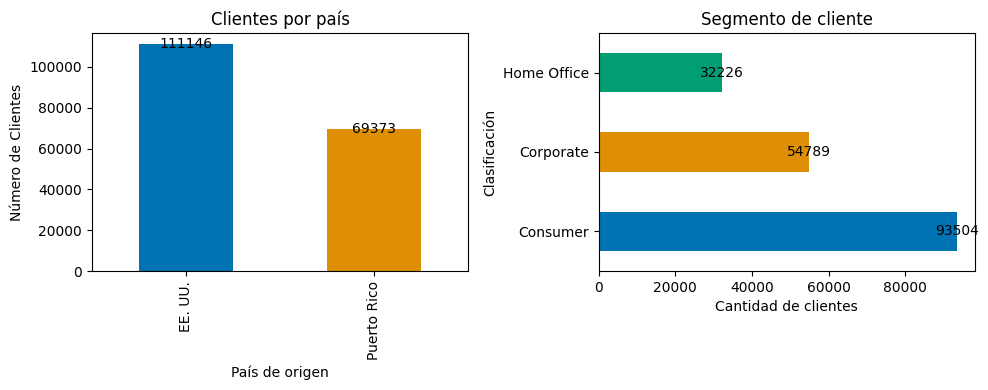

In [8]:
# Paleta de colores
color_palette = sns.color_palette('colorblind')

# Crear subplot con 1 fila y dos columnas 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Grafica para clientes por pais
customer_demographic['Customer Country'].value_counts().plot(kind='bar', ax=axes[0], title='Clientes por país', color=color_palette)

axes[0].set_xlabel('País de origen')  # X-axis label
axes[0].set_ylabel('Número de Clientes')  # Y-axis label

for p in axes[0].patches:
    axes[0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')


# Grafica para clasificacion de clientes
customer_demographic['Customer Segment'].value_counts().plot(kind='barh', ax=axes[1], title='Segmento de cliente', color=color_palette)

axes[1].set_xlabel('Cantidad de clientes')  # X-axis label
axes[1].set_ylabel('Clasificación')  # Y-axis label

for p in axes[1].patches:
    axes[1].annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center')

# Ajuste de espacio entre graficas
plt.tight_layout(pad=1.08)

plt.show()

### Análisis de Información de Pedidos:

#### Rango de Fechas:

- Fecha del Primer Pedido: 1 de enero de 2015
- Fecha del Último Pedido: 31 de enero de 2018
  
#### Métricas de Envío:

- Promedio de Días de Envío Anticipado: 1.50 días
- Promedio de Días de Retraso en el Envío: 1.62 días
- Mayor tiempo de Retraso: 4 días
- Tiempo Promedio de Entrega: 3 días
- Cantidad de paises proovedores: 164

#### Distribución del Estado de los Pedidos:

- La mayoría de los pedidos están en estado COMPLETO, lo que indica transacciones exitosas.

#### Distribución del Modo de Envío:

- La clase estándar es el modo de envío más común.
  
#### Distribución Regional de los Pedidos:

- Los pedidos están distribuidos en varias regiones,siendo América Central y Europa Occidental las regiones con mayor cantidad de pedidos.
  
#### Pedidos Año Tras Año:

- Disminución gradual de pedidos anuales desde 2015 hasta 2017, con una caída notable en 2018.
  

In [9]:
order_info.head()

,Order Id,Product Card Id,Order Customer Id,order date (DateOrders),Order Status,Order Region,Order State,Order City,Order Country,shipping date (DateOrders),Shipping Mode,Days for shipping (real),Days for shipment (scheduled)
0,77202,1360,20755,1/31/2018 22:56,COMPLETE,Southeast Asia,Java Occidental,Bekasi,Indonesia,2/3/2018 22:56,Standard Class,3,4
1,75939,1360,19492,1/13/2018 12:27,PENDING,South Asia,Rajast�n,Bikaner,India,1/18/2018 12:27,Standard Class,5,4
2,75938,1360,19491,1/13/2018 12:06,CLOSED,South Asia,Rajast�n,Bikaner,India,1/17/2018 12:06,Standard Class,4,4
3,75937,1360,19490,1/13/2018 11:45,COMPLETE,Oceania,Queensland,Townsville,Australia,1/16/2018 11:45,Standard Class,3,4
4,75936,1360,19489,1/13/2018 11:24,PENDING_PAYMENT,Oceania,Queensland,Townsville,Australia,1/15/2018 11:24,Standard Class,2,4


In [10]:
#fromato datetime a la columna order date y shipping date

order_info['order date (DateOrders)'] = pd.to_datetime(order_info['order date (DateOrders)'])
order_info['shipping date (DateOrders)'] = pd.to_datetime(order_info['shipping date (DateOrders)'])

In [11]:
order_info.head()

,Order Id,Product Card Id,Order Customer Id,order date (DateOrders),Order Status,Order Region,Order State,Order City,Order Country,shipping date (DateOrders),Shipping Mode,Days for shipping (real),Days for shipment (scheduled)
0,77202,1360,20755,2018-01-31 22:56:00,COMPLETE,Southeast Asia,Java Occidental,Bekasi,Indonesia,2018-02-03 22:56:00,Standard Class,3,4
1,75939,1360,19492,2018-01-13 12:27:00,PENDING,South Asia,Rajast�n,Bikaner,India,2018-01-18 12:27:00,Standard Class,5,4
2,75938,1360,19491,2018-01-13 12:06:00,CLOSED,South Asia,Rajast�n,Bikaner,India,2018-01-17 12:06:00,Standard Class,4,4
3,75937,1360,19490,2018-01-13 11:45:00,COMPLETE,Oceania,Queensland,Townsville,Australia,2018-01-16 11:45:00,Standard Class,3,4
4,75936,1360,19489,2018-01-13 11:24:00,PENDING_PAYMENT,Oceania,Queensland,Townsville,Australia,2018-01-15 11:24:00,Standard Class,2,4


In [12]:
#usando min y max sobre la columna de fecha de orden, obtenemos la primera y ultima compra
primera_orden = order_info['order date (DateOrders)'].min()
Ultima_orden =order_info['order date (DateOrders)'].max()

print(f'Primera orden : {primera_orden}')
print(f'Ultima orden : {Ultima_orden}')

Primera orden : 2015-01-01 00:00:00
Ultima orden : 2018-01-31 23:38:00


In [13]:
#creamos un diccionario para reemplazar los nombres de las columnas Days for shipment y Days for shipping

new_name={
    'Days for shipment (scheduled)' : 'Expected Shipping',
    'Days for shipping (real)' : 'Actual Shipping',
    }
order_info.rename(new_name,axis = 1, inplace = True)

#Creamos una variable para guardar el residuo de Expected shipping - Actual shipping

order_info['shiping_var']= order_info['Expected Shipping']- order_info['Actual Shipping'] 


In [14]:
order_info.head()

,Order Id,Product Card Id,Order Customer Id,order date (DateOrders),Order Status,Order Region,Order State,Order City,Order Country,shipping date (DateOrders),Shipping Mode,Actual Shipping,Expected Shipping,shiping_var
0,77202,1360,20755,2018-01-31 22:56:00,COMPLETE,Southeast Asia,Java Occidental,Bekasi,Indonesia,2018-02-03 22:56:00,Standard Class,3,4,1
1,75939,1360,19492,2018-01-13 12:27:00,PENDING,South Asia,Rajast�n,Bikaner,India,2018-01-18 12:27:00,Standard Class,5,4,-1
2,75938,1360,19491,2018-01-13 12:06:00,CLOSED,South Asia,Rajast�n,Bikaner,India,2018-01-17 12:06:00,Standard Class,4,4,0
3,75937,1360,19490,2018-01-13 11:45:00,COMPLETE,Oceania,Queensland,Townsville,Australia,2018-01-16 11:45:00,Standard Class,3,4,1
4,75936,1360,19489,2018-01-13 11:24:00,PENDING_PAYMENT,Oceania,Queensland,Townsville,Australia,2018-01-15 11:24:00,Standard Class,2,4,2


In [15]:
"""Utilizando filtros y metodos estadisticos como ,mean(), se puede obtener cual 
es el promedio de dias con envio anticipado y con retraso"""

anticipado = order_info[order_info['shiping_var']>0]['shiping_var'].mean()
retrasado = order_info[order_info['shiping_var']<0]['shiping_var'].abs().mean()

print(f'Promedio de Días de Envío Anticipado: : {anticipado}')
print(f'Promedio de Días de Retraso en el Envío: : {retrasado}')

Promedio de Días de Envío Anticipado: : 1.499607987824563
Promedio de Días de Retraso en el Envío: : 1.6167408123791103


In [16]:
#Mayor numero de dias de retraso
max_delay = order_info['shiping_var'].min()
print(f'Mayor tiempo de retraso: {max_delay*-1} Days')

Mayor tiempo de retraso: 4 Days


In [17]:
#Tiempo promedio de entrega
promedio_entrega = order_info['Actual Shipping'].mean().round()

print(f'Tiempo Promedio de Entrega: {int(promedio_entrega)} days')

Tiempo Promedio de Entrega: 3 days


In [18]:
paises = order_info['Order Country'].nunique()
print(f'Numero de paises proovedores : {paises}')

Numero de paises proovedores : 164


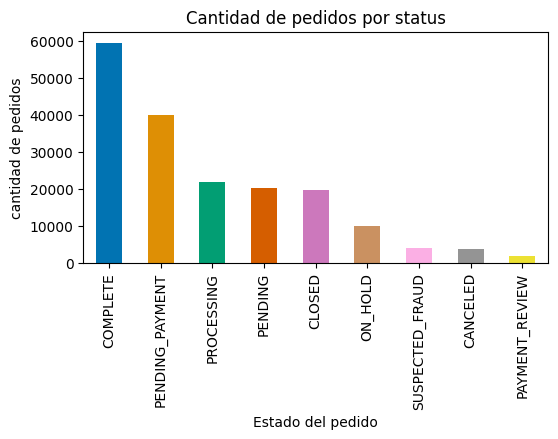

In [30]:
# Paleta de colores
color_palette = sns.color_palette('colorblind')

# Usando la columna order status como serie aplicamos el metodo value_counts() y graficamos el resultado
ax = order_info['Order Status'].value_counts().plot(kind='bar', figsize=(6, 3), title='Cantidad de pedidos por status', color=color_palette)
ax.set_xlabel('Estado del pedido') 
ax.set_ylabel('cantidad de pedidos') 
# Agregar cantidades como etiquetas
#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 2), textcoords='offset points')


plt.show()

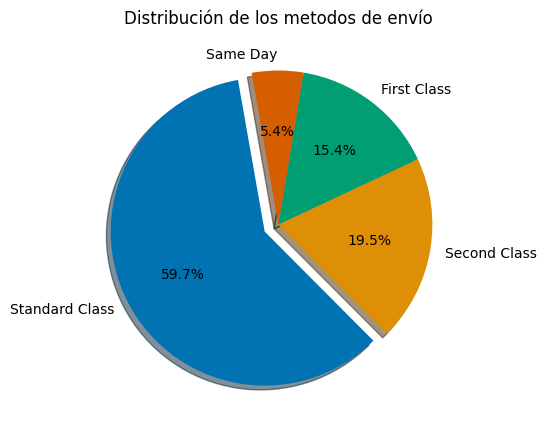

In [20]:
# Paleta de color
color_palette = sns.color_palette('colorblind')

# Graficar la columna shippig mode agregando un enfasis en la porcion mas grande

shipping_mode = order_info['Shipping Mode'].value_counts()
explode = (0.1, 0, 0, 0)  # Ajuste del enfasis

shipping_mode.plot(kind='pie', autopct='%1.1f%%', startangle=100, figsize=(5, 5),
                   colors=color_palette, explode=explode, shadow=True)

plt.title('Distribución de los metodos de envío')
plt.ylabel('')

plt.show()

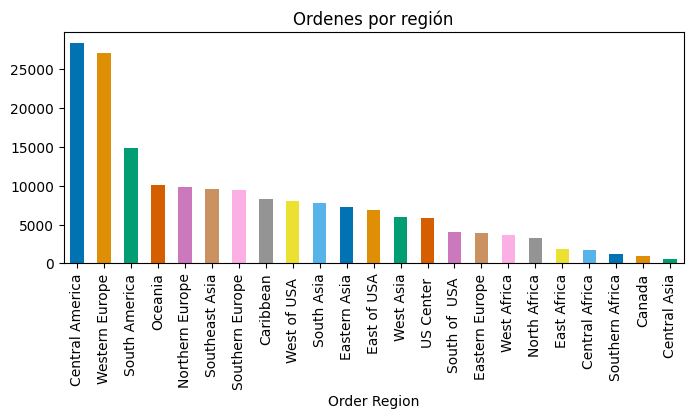

In [21]:
# Paleta de colores
color_palette = sns.color_palette('colorblind')

# Graficar la region del pedido
cuenta_ordenes_xregion = order_info['Order Region'].value_counts()
ax = cuenta_ordenes_xregion.plot(kind='bar', figsize=(8, 3), color=color_palette, title='Ordenes por región')

# Agregar cantidades como etiquetas
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points',rotation=45)

 
plt.show()

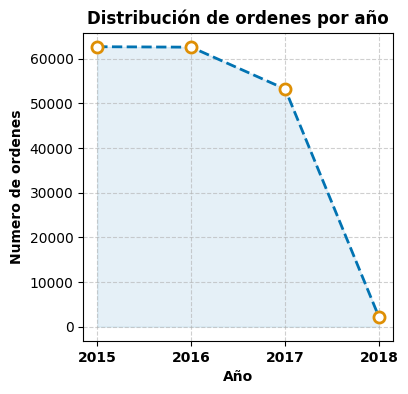

In [22]:
# Paleta de color
color_palette = sns.color_palette('colorblind')


order_info['month'] =order_info['order date (DateOrders)'].dt.month
order_info["year"] = order_info['order date (DateOrders)'].dt.year

# agrupar la columna year por año y ordenarlos
year_over_years_orders = order_info["year"].value_counts().sort_index()

# genera la figura
plt.figure(figsize=(4, 4))

# generar el grafico 
plt.plot(year_over_years_orders.index, 
         year_over_years_orders.values, 
         marker='o', linestyle='--', color=color_palette[0], 
         linewidth=2, markersize=8, markerfacecolor='white', 
         markeredgewidth=2, markeredgecolor=color_palette[1])

# Agregar cuadricula
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels and title with custom fonts
plt.xlabel('Año',fontweight='bold')
plt.ylabel('Numero de ordenes',fontweight='bold')
plt.title('Distribución de ordenes por año',fontweight='bold')

# ticks para mostrar solo enteros
plt.xticks(year_over_years_orders.index,fontweight='bold')

# sombra debajo de la linea
plt.fill_between(year_over_years_orders.index, 
                 year_over_years_orders.values, 
                 color=color_palette[0], alpha=0.1)
plt.show()


### Análisis de Inventario y Precios de Productos:

Tamaño del Inventario: Existe un inventario de 118 productos únicos.

Características Descriptivas para la Columna 'Precio del Producto':

- Cantidad: 180,519 (número de valores no nulos)
  
- Promedio (Media): $141.23 (valor típico en el conjunto de datos)
  
- Desviación Estándar (Variabilidad): $139.73 (medida de la cantidad de variación)
  
- Mínimo (Más Pequeño): $9.99 (valor más bajo en el conjunto de datos)
  
- Percentil 25 (Q1): $50.00 (el 25% de los datos están por debajo de este valor)
  
- Mediana (Q2 o Central): $59.99 (valor medio de la columna)
  
- Percentil 75 (Q3): $199.99 (el 75% de los datos están por debajo de este valor)
  
- Máximo (Más Alto): $1999.99 (valor más alto en el conjunto de datos)
  
Estas estadísticas proporcionan información sobre la distribución y las tendencias centrales de la columna 'Product price', ayudando a comprender la estructura de precios y la variabilidad dentro del inventario.

In [23]:
product_info.head()

,Product Card Id,Order Item Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status
0,1360,180517,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
1,1360,179254,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
2,1360,179253,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
3,1360,179252,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
4,1360,179251,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0


In [24]:
Productos= product_info['Product Name'].nunique()

print(f'Cantidad de productos: {Productos}')

Cantidad de productos: 118


In [25]:
product_info['Product Price'].describe()

count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Product Price, dtype: float64

### Información de Mercado

El conjunto de datos indica que los mercados con mayor participación están en LATAM (América Latina), Europa y Asia Pacífico.
Estos mercados tienen la mayor cantidad de ocurrencias en el conjunto de datos, con los siguientes conteos específicos:

- LATAM: 51,594 ocurrencias
- Europa: 50,252 ocurrencias
- Asia Pacífico: 41,260 ocurrencias
- USCA (Estados Unidos y Canadá): 25,799 ocurrencias
- África: 11,614 ocurrencias


In [26]:
location_info.head()

,Product Card Id,Latitude,Longitude,Market,Department Id,Department Name
0,1360,18.251453,-66.037056,Pacific Asia,2,Fitness
1,1360,18.279451,-66.037064,Pacific Asia,2,Fitness
2,1360,37.292233,-121.881279,Pacific Asia,2,Fitness
3,1360,34.125946,-118.291016,Pacific Asia,2,Fitness
4,1360,18.253769,-66.037048,Pacific Asia,2,Fitness


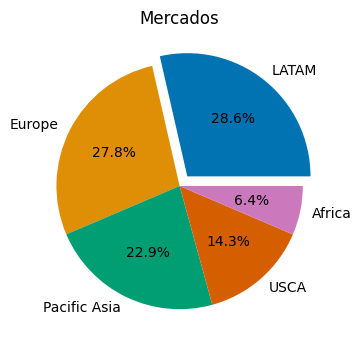

In [27]:
# Paleta
color_palette = sns.color_palette('colorblind')

# definir la data a graficar
explode = (0.1, 0, 0, 0, 0)
location_info['Market'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4),
                                              colors=color_palette, explode=explode)

plt.title('Mercados')
plt.ylabel("")

 
plt.show()

### Distribucion de las ordenes por categoría

El conjunto de datos incluye varias categorías, cada uno con diferentes niveles de demanda.
Las principales categorias según el número de ocurrencias son:

- Fan Shop: 66,861 ocurrencias
- Apparel (Ropa): 48,998 ocurrencias
- Otras categorías incluyen Golf, Calzado, Aire Libre, Fitness, Tienda de Discos, Tecnología, Tienda de Mascotas, Librería y Salud y Belleza, cada uno con distintos niveles de demanda.

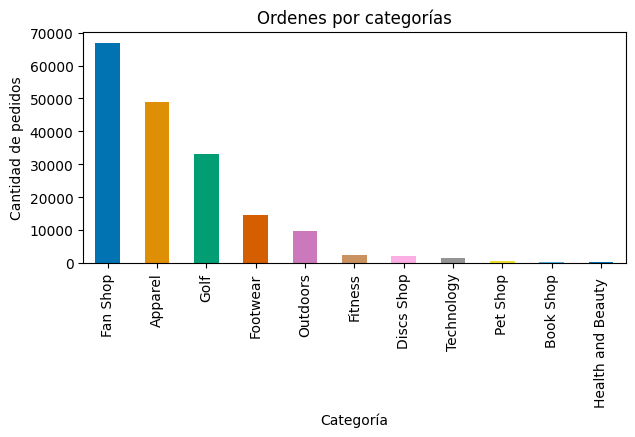

In [28]:
# Paleta de colores
color_palette = sns.color_palette('colorblind')

# Grafica
ax = location_info['Department Name'].value_counts().plot(kind='bar', figsize=(7, 3), color=color_palette)
ax.set_xlabel('Categoría')
ax.set_ylabel('Cantidad de pedidos')

# agregar etiquetas de datos
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Ordenes por categorías')

 
plt.show()